# 💠Decision Tree💠

In [1]:
import pandas as pd                                                          #Importing necessary libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

## 💠Exploratory data analysis (EDA)

In [2]:
data=pd.read_excel('heart_disease.xlsx')                                    #Loading the data
print('Shape of data ',data.shape)
data.head()

Shape of data  (908, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
data.isnull().sum()                                                     #Checking for NULL values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
data['oldpeak']=data['oldpeak'].fillna(value=data['oldpeak'].mean())    # Imputing the null values with mean
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [5]:
data.duplicated().sum()                                                 # Checking for Duplicates

0

In [6]:
data.info()                                                             # Checking data types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


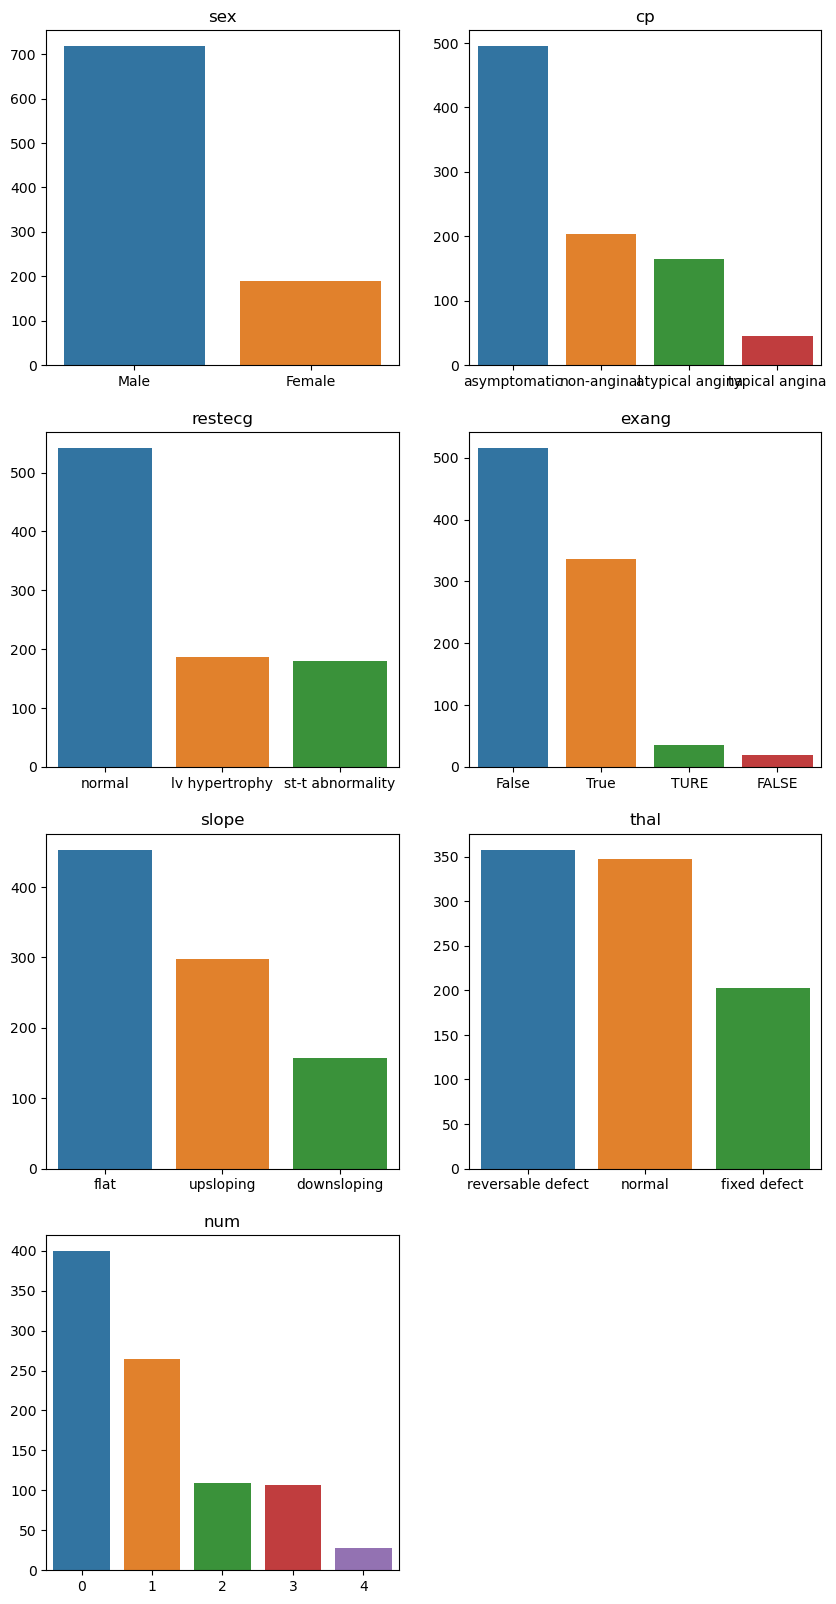

In [7]:
Cat_data=[x for x in data.columns if (data[x].dtype)=='object' or x=='num']  #Plotting categorical data

plt.figure(figsize=(10,20))

for x,y in enumerate(Cat_data):
    d=data[y].value_counts()
    plt.subplot(4,2,x+1)
    sns.barplot(x=d.index,y=d.values)
    plt.title(y)
plt.show()

In [8]:
data['exang']=data['exang'].replace('FALSE',False)                   #Replacing Incorrectly filled values
data['exang']=data['exang'].replace('TURE',True)
data['exang'].value_counts()

False    535
True     373
Name: exang, dtype: int64

### 🚩Note: Converting the Target variable to (0,1) format as the amount of data present is too less for training                              model with 5 categories

In [9]:
data['num']=data['num'].replace([2,3,4],1)
data['num'].value_counts()

1    509
0    399
Name: num, dtype: int64

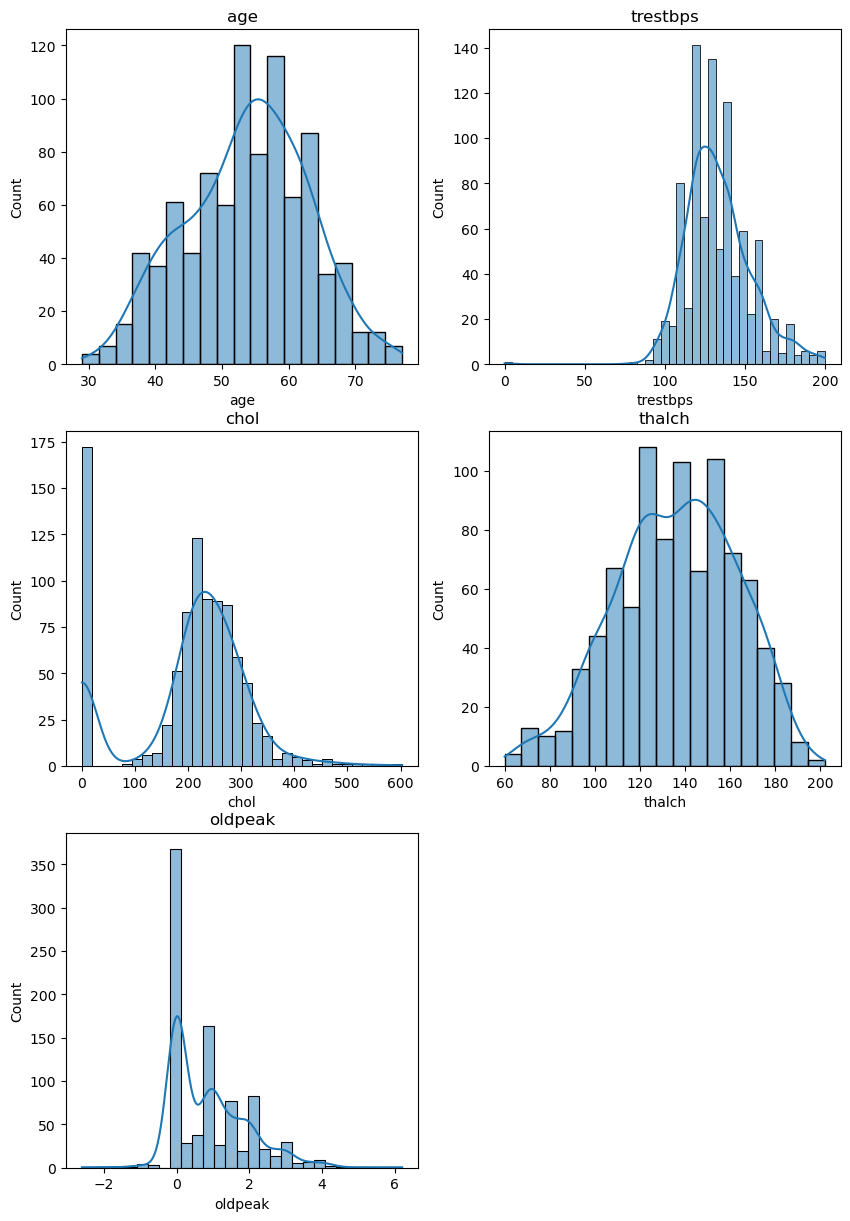

In [10]:
Num_data=[x for x in data.columns if ((data[x].dtype)=='int64' or (data[x].dtype)==float) and x!='num']

plt.figure(figsize=(10,20))                          #Data distribution for numeric columns 
for x,y in enumerate(Num_data):
    plt.subplot(4,2,x+1)
    sns.histplot(data[y],kde=True)
    plt.title(y)
plt.show()

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_17348\1636931205.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

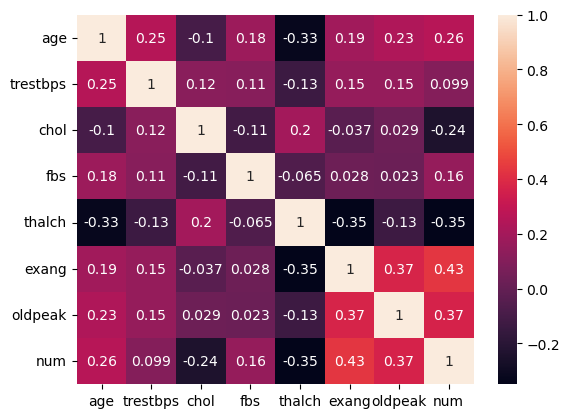

In [11]:
sns.heatmap(data.corr(),annot=True)                         # Checking correlation between target and numeric variables 
plt.plot

## 💠Train_test_split and Encoding the features 

In [12]:
X=data.drop('num',axis=1)                                           # Splitting the data for training and testing  
Y=data['num']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((726, 12), (726,))
▶Shape of X_test,y_test ((182, 12), (182,))


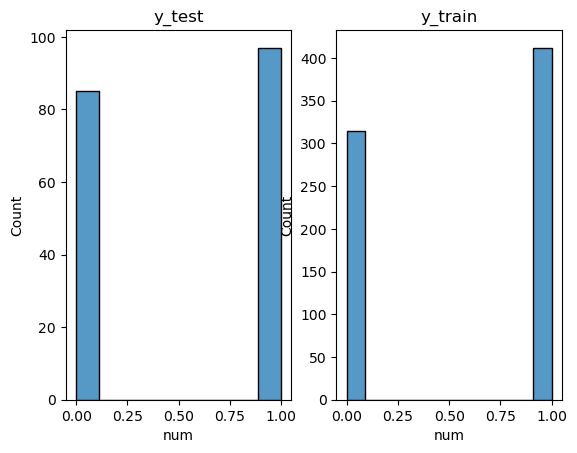

In [13]:
plt.subplot(1,2,1)                                               # Data distribution in y_train and y_test
sns.histplot(y_test)
plt.title('y_test')
plt.subplot(1,2,2)
sns.histplot(y_train)
plt.title('y_train')
plt.show()

In [14]:
# Using column transformer for one hot encoding 
Col_transformer=ColumnTransformer(
transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),['sex','cp','restecg','slope','thal'])],
remainder='passthrough'
)

In [15]:
X_train=Col_transformer.fit_transform(X_train)    
X_train.shape

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(726, 17)

In [16]:
X_test=Col_transformer.transform(X_test)
X_test.shape

(182, 17)

## 💠Model Building : DecisionTreeClassifier

In [42]:
DTC_model=DecisionTreeClassifier(max_depth=4,min_samples_split=30,min_samples_leaf=90)        # Model Training 

DTC_model.fit(X_train,y_train)

y_predict=DTC_model.predict(X_test)
Y_predict=DTC_model.predict(X_train)

Test accuracy   0.7637362637362637
Train accuracy  0.7548209366391184
__________________________________________________
Test precision_score   0.813953488372093
Train precision_score  0.8482142857142857


<Axes: >

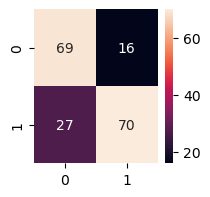

In [43]:
print('Test accuracy  ',accuracy_score (y_test,y_predict))                                    # Model Evaluation 
print('Train accuracy ',accuracy_score (y_train,Y_predict))
print('__________________________________________________')
print('Test precision_score  ',precision_score (y_test,y_predict))
print('Train precision_score ',precision_score (y_train,Y_predict))

conf_mat = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat,annot=True)

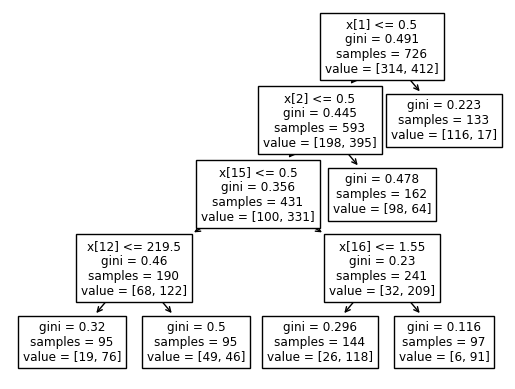

In [44]:
plot_tree(DTC_model)                                              # Visualising the Decision tree
plt.show()

## 💠Interview Questions:
### ▶1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
    The parameter I have used to control the problem of overfitting are,
    max_depth         : The parameter restricts maximum depth the decision tree allowed to grow.
    min_samples_split : Indicates the minimum number of samples that are needed to split a node. 
    min_samples_leaf  : The min_samples_leaf hyperparameter defines the required minimal amount of samples to be present at a leaf node.
    
### ▶2. What is the difference between the Label encoding and One-hot encoding?
    Label Encoding is great when you have categories with an inherent order or rank, like ‘low,’ ‘medium,’ and ‘high’.
    Label Encoder : Is used for target variable which is ordinal.
    Ordinal Encoder : Is used for encoding ordinal features.
    One-hot encoding is used when you have nominal categorical data like colours 'Black','Red','Blue',we cannot form any order here
